EPL과 FPL 데이터를 통한 선수의 시장가치 분석
------------------------------------------------------------------------------------

###남승범
------------------------------------------------------------------------------------

## 1. 오픈데이터 설명
아래 데이터는 캐글에서 찾은 2017/18 시즌 잉글랜드 프리미어리그 선수들 관련 데이터이다. 대부분의 선수 관련 데이터는 경기 내 스텟(골,어시,패스 횟수)에만 치중되어 있는 경우가 많지만 이 데이터가 특이한 점은
 1. FPL(판타지 프리미어리그), EPL에서 공식적으로 운영하는 시뮬레이션 게임 관련 지표를 사용한다. FPL 게임의 이용자들은 실제로 현재 EPL에서 뛰고있는 선수들을 이용해 나만의 스쿼드를 만드는 게임으로써 선수의 인기나 성능(실력)에 따른 선호도를 보여주는 지표가 된다.
 2. market_value 라는 칼럼은 transfer markT 기준으로 해당 선수의 시장 가치를 알려준다.
 라는 점이다.

각각의 칼럼을 설명하자면 아래와 같다.
 1. name(이름)
 2. club(소속팀/범주형)
 3. age(나이)
 4. position(포지션/범주형) / position_cat(공격수는 1,미드필더는 2,수비수는 3, 골키퍼는 4로 범주화)
 5. market_value(시장가치), page_views(일일 평균 위키피디아 검색량),
 6. fpl_value(FPL 게임 내 금액으로 총 100유로가 주어지며 이를 적절히 분배해 15명의 선수를 구매해야한다)
 7. fpl_sel(전체 플레이어 중 해당 선수를 사용하는 비율)
 8. fpl_point(지난 시즌(즉,2016/17시즌에) 기준으로, 게임 내 해당 선수의 능력치로 현실에서 그 선수가 좋은 퍼포먼스를 보일때마다 올라가고, 아쉬운 모습을 보일때마다 떨어진다. 즉, 높은 점수를 가지고 있을수록 잘하는 선수라고 볼 수 있다.)
 9. region(잉글랜드 국적은 1, 영국 외 유럽 국적은 2, 아메리카 대륙 소속 나라 국적은 3, 그 외 지역은 4로 범주화) / nationality(국적/범주형)
 10. new_foreign(지난 시즌 다른 리그에서 뛰다가 epl로 이적해온 경우 1)
 11. big_club(아스날,첼시,맨체스터 유나이티드,맨체스터 시티,토트넘,리버풀 소위 빅6 클럽 소속 선수들은 1)
 ------------------------------------------------------------------------------------

## 2.데이터 보기
가장 먼저 파일을 컴퓨터에서 df0으로 불러온 이후, to_csv를 이용해 final_DB라는 새로운 이름으로 백업한다. 그리고 다시 final_DB 파일을 df로 불러와 데이터를 만질 준비를 완료한다.

In [ ]:
import pandas as pd
file_path= '/Users/sbnama/epldata_final.csv'
df0=pd.read_csv(file_path, encoding='CP949')
df0

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
0,Aaron Ramsey,Arsenal,26,CM,2,35.0,1040.0,7.0,5.10%,56,1.0,Wales,0,1
1,Alex Iwobi,Arsenal,21,LW,1,10.0,1812.0,5.5,1.00%,89,4.0,Nigeria,0,1
2,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519.0,6.0,1.80%,83,1.0,England,0,1
3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.50%,0,2.0,France,1,1
4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.10%,264,3.0,Chile,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Pedro Obiang,West+Ham,25,CM,2,9.0,286.0,4.5,0.30%,55,2.0,Spain,0,0
457,Robert Snodgrass,West+Ham,29,RW,1,8.0,1210.0,6.0,6.50%,133,2.0,Scotland,0,0
458,Sam Byram,West+Ham,23,RB,3,4.5,198.0,4.5,0.30%,29,1.0,England,0,0
459,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394.0,5.5,0.20%,55,4.0,Algeria,0,0


In [ ]:
df0.to_csv("/Users/sbnama/final_DB.csv")

In [ ]:
file_path= '/Users/sbnama/final_DB.csv'
df=pd.read_csv(file_path, encoding='CP949')
df

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
0,0,Aaron Ramsey,Arsenal,26,CM,2,35.0,1040.0,7.0,5.10%,56,1.0,Wales,0,1
1,1,Alex Iwobi,Arsenal,21,LW,1,10.0,1812.0,5.5,1.00%,89,4.0,Nigeria,0,1
2,2,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519.0,6.0,1.80%,83,1.0,England,0,1
3,3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.50%,0,2.0,France,1,1
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.10%,264,3.0,Chile,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,Pedro Obiang,West+Ham,25,CM,2,9.0,286.0,4.5,0.30%,55,2.0,Spain,0,0
457,457,Robert Snodgrass,West+Ham,29,RW,1,8.0,1210.0,6.0,6.50%,133,2.0,Scotland,0,0
458,458,Sam Byram,West+Ham,23,RB,3,4.5,198.0,4.5,0.30%,29,1.0,England,0,0
459,459,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394.0,5.5,0.20%,55,4.0,Algeria,0,0


다음으로는 데이터프레임의 기본 정보를 출력하겠다. 칼럼의 데이터 타입,결측치를 확인할 수 있다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    461 non-null    int64  
 1   name          461 non-null    object 
 2   club          461 non-null    object 
 3   age           461 non-null    int64  
 4   position      461 non-null    object 
 5   position_cat  461 non-null    int64  
 6   market_value  461 non-null    float64
 7   page_views    460 non-null    float64
 8   fpl_value     461 non-null    float64
 9   fpl_sel       460 non-null    object 
 10  fpl_points    461 non-null    int64  
 11  region        460 non-null    float64
 12  nationality   461 non-null    object 
 13  new_foreign   461 non-null    int64  
 14  big_club      461 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 54.1+ KB


FPL과 실제 시장가치만을 확인해보고 싶어 전체의 칼럼 'name','market_value','fpl_value'만을 가져왔다

In [ ]:
df.loc[::,['name','market_value','fpl_value']]

,name,market_value,fpl_value
0,Aaron Ramsey,35.0,7.0
1,Alex Iwobi,10.0,5.5
2,Alex Oxlade-Chamberlain,22.0,6.0
3,Alexandre Lacazette,40.0,10.5
4,Alexis Sanchez,65.0,12.0
...,...,...,...
456,Pedro Obiang,9.0,4.5
457,Robert Snodgrass,8.0,6.0
458,Sam Byram,4.5,4.5
459,Sofiane Feghouli,12.0,5.5


다음으로는 빅6 팀 중에서 유럽과 아메리카 대륙 외 선수가 얼마나 있는지 확인해보고 싶다.

In [ ]:
df[(df['big_club']==1)&(df['region']==4)]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
1,1,Alex Iwobi,Arsenal,21,LW,1,10.0,1812.0,5.5,1.00%,89,4.0,Nigeria,0,1
18,18,Mohamed Elneny,Arsenal,25,DM,2,10.0,683.0,4.5,0.80%,26,4.0,Egypt,0,1
109,109,Victor Moses,Chelsea,26,RM,2,18.0,2537.0,6.5,0.20%,105,4.0,Nigeria,0,1
231,231,Mohamed Salah,Liverpool,25,RW,1,35.0,1117.0,9.0,12.40%,0,4.0,Egypt,1,1
236,236,Sadio Mane,Liverpool,25,LW,1,40.0,3219.0,9.5,5.30%,156,4.0,Senegal,0,1
251,251,Kelechi Iheanacho,Manchester+City,20,CF,1,15.0,1662.0,7.0,1.50%,52,4.0,Nigeria,0,1
259,259,Yaya Toure,Manchester+City,34,CM,2,8.0,2318.0,6.5,2.50%,86,4.0,Cote d'Ivoire,0,1
268,268,Eric Bailly,Manchester+United,23,CB,3,30.0,1588.0,6.0,10.20%,105,4.0,Cote d'Ivoire,0,1
269,269,Henrikh Mkhitaryan,Manchester+United,28,AM,1,35.0,3312.0,8.0,4.50%,73,4.0,Armenia,0,1
392,392,Son Heung-min,Tottenham,25,LW,1,30.0,2185.0,8.0,1.60%,174,4.0,South Korea,0,1


총 11명의 선수가 있는것을 확인 할 수 있다. 그렇다면 전체 유럽과 아메리카 대륙 외 선수 중 나이가 23세 이하 유망주 선수를 확인하고싶다.

In [ ]:
df[(df['region']==4)&(df['age']<=23)]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
1,1,Alex Iwobi,Arsenal,21,LW,1,10.0,1812.0,5.5,1.00%,89,4.0,Nigeria,0,1
34,34,Brad Smith,Bournemouth,23,LB,3,2.0,297.0,4.0,3.30%,4,4.0,Australia,0,0
194,194,Daniel Amartey,Leicester+City,22,DM,2,5.0,356.0,4.5,0.30%,53,4.0,Ghana,0,0
211,211,Wilfred Ndidi,Leicester+City,20,DM,2,14.0,821.0,5.0,0.50%,59,4.0,Nigeria,0,0
251,251,Kelechi Iheanacho,Manchester+City,20,CF,1,15.0,1662.0,7.0,1.50%,52,4.0,Nigeria,0,1
268,268,Eric Bailly,Manchester+United,23,CB,3,30.0,1588.0,6.0,10.20%,105,4.0,Cote d'Ivoire,0,1
326,326,Sofiane Boufal,Southampton,23,AM,1,15.0,590.0,6.0,0.30%,40,4.0,Morocco,0,0
346,346,Ramadan Sobhi,Stoke+City,20,LW,1,5.0,461.0,5.0,1.10%,36,4.0,Egypt,0,0
403,403,Isaac Success,Watford,21,LW,1,4.0,474.0,5.5,0.10%,28,4.0,Nigeria,0,0
444,444,Arthur Masuaku,West+Ham,23,LB,3,7.0,199.0,4.5,0.20%,34,4.0,Congo DR,0,0


다음으로는 한국 국적의 선수를 확인해보고싶다. 총 3명이 뛰고 있다는 것을 확인 할 수 있다.

In [ ]:
df[df['nationality'].isin(['South Korea'])]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
123,123,Lee Chung-yong,Crystal+Palace,29,RW,1,1.5,327.0,4.5,0.10%,24,4.0,South Korea,0,0
360,360,Ki Sung-yueng,Swansea,28,DM,2,7.0,478.0,5.0,0.00%,41,4.0,South Korea,0,0
392,392,Son Heung-min,Tottenham,25,LW,1,30.0,2185.0,8.0,1.60%,174,4.0,South Korea,0,1


club, position, nationality 는 현재 문자열(object)형으로 저장되어 있지만 이 칼럼들은 모두 범주형이고, 범주형 문자열의 경우 카테고리형이 분석 시 용량과 속도에 유리하기에 변환해주도록 하겠다.

또한 fpl_sel 칼럼의 경우는 뒤에 %가 붙어있어 문자열 형이지만, %를 제거하고 float64 형으로 바꿔서 분석에 용이하게 만들도록 하겠다.

In [ ]:
df['club']=df['club'].astype('category')
df['position']=df['position'].astype('category')
df['nationality']=df['nationality'].astype('category')

df['fpl_sel'] = df['fpl_sel'].str.replace('%', '')
df['fpl_sel'] = df['fpl_sel'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Unnamed: 0    461 non-null    int64   
 1   name          461 non-null    object  
 2   club          461 non-null    category
 3   age           461 non-null    int64   
 4   position      461 non-null    category
 5   position_cat  461 non-null    int64   
 6   market_value  461 non-null    float64 
 7   page_views    460 non-null    float64 
 8   fpl_value     461 non-null    float64 
 9   fpl_sel       460 non-null    float64 
 10  fpl_points    461 non-null    int64   
 11  region        460 non-null    float64 
 12  nationality   461 non-null    category
 13  new_foreign   461 non-null    int64   
 14  big_club      461 non-null    int64   
dtypes: category(3), float64(5), int64(6), object(1)
memory usage: 48.6+ KB


위 3개의 칼럼이 카테고리 형으로 바뀌고, fpl_sel은 float64형으로 바뀐것을 확인할 수 있다. 다음으로는 marker_value 와 fpl_sel을 기준으로 각각 내림차순 정렬을 통해 상위권 선수들의 추이를 파악해보도록 하겠다.

In [ ]:
df.sort_values(by=['market_value'],axis=0,ascending=False)

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
97,97,Eden Hazard,Chelsea,26,LW,1,75.00,4220.0,10.5,2.3,224,2.0,Belgium,0,1
279,279,Paul Pogba,Manchester+United,24,CM,2,75.00,7435.0,8.0,19.5,115,2.0,France,0,1
252,252,Kevin De Bruyne,Manchester+City,26,AM,1,65.00,2252.0,10.0,17.5,199,2.0,Belgium,0,1
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.00,4329.0,12.0,17.1,264,3.0,Chile,0,1
257,257,Sergio Aguero,Manchester+City,29,CF,1,65.00,4046.0,11.5,9.7,175,3.0,Argentina,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,Joel Coleman,Huddersfield,21,GK,4,0.25,36.0,4.0,2.4,0,1.0,England,0,0
170,170,Joe Lolley,Huddersfield,24,RW,1,0.25,63.0,4.5,0.1,0,1.0,England,0,0
438,438,Sam Field,West+Brom,19,CM,2,0.25,15.0,4.5,0.1,9,1.0,England,0,0
271,271,Joel Castro Pereira,Manchester+United,21,GK,4,0.10,395.0,4.0,1.0,6,2.0,Portugal,0,1


In [ ]:
df.sort_values(by=['fpl_sel'],axis=0,ascending=False)

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
281,281,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727.0,11.5,45.0,221,2.0,Belgium,0,1
379,379,Dele Alli,Tottenham,21,CM,2,45.0,4626.0,9.5,38.6,225,1.0,England,0,1
383,383,Harry Kane,Tottenham,23,CF,1,60.0,4161.0,12.5,35.1,224,1.0,England,0,1
233,233,Philippe Coutinho,Liverpool,25,AM,1,45.0,2958.0,9.0,30.8,171,3.0,Brazil,0,1
3,3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.5,0,2.0,France,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,Ki Sung-yueng,Swansea,28,DM,2,7.0,478.0,5.0,0.0,41,4.0,South Korea,0,0
431,431,James Morrison,West+Brom,31,CM,2,5.0,238.0,5.5,0.0,84,2.0,Scotland,0,0
78,78,Dean Marney,Burnley,33,CM,2,1.0,171.0,4.5,0.0,51,1.0,England,0,0
204,204,Molla Wague,Leicester+City,26,CB,3,1.5,171.0,4.5,0.0,0,4.0,Mali,0,0


시장 가치 기준으로는 아자르, 포그바, 데브라위너 선수가 가장 높은 걸 확인할 수 있고 fpl에서의 선택률은 루카쿠,델리 알리,해리 케인이 가장 높은것을 확인 할 수 있다. 시장가치와 fpl 선택률이 완벽히 똑같지는 않아보인다.

다음으로는 범주형 데이터 간의 빈도분석과 교차분석을 진행하겠다. 국가별,포지션별,포지션 범주별 빈도분석과 국가별 포지션 교차분석표를 확인해보겠다.

In [ ]:
df['position'].value_counts()

CB    85
CM    63
CF    61
GK    42
DM    36
LW    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: position, dtype: int64

In [ ]:
df['position_cat'].value_counts()

1    154
3    153
2    112
4     42
Name: position_cat, dtype: int64

In [ ]:
df['nationality'].value_counts()

England        156
Spain           28
France          25
Netherlands     20
Belgium         18
              ... 
Bermuda          1
New Zealand      1
Greece           1
Canada           1
Kenya            1
Name: nationality, Length: 61, dtype: int64

In [ ]:
df['region'].value_counts()

2.0    207
1.0    156
4.0     56
3.0     41
Name: region, dtype: int64

In [ ]:
pd.crosstab(df['region'],df['position_cat'],margins=True)

position_cat,1,2,3,4,All
region,,,,,
1.0,52,41,54,9,156
2.0,58,54,72,23,207
3.0,14,5,14,8,41
4.0,29,12,13,2,56
All,153,112,153,42,460


epl에서 뛰고 있는 선수들 중 영국 국적 선수가 압도적으로 많다는 사실을 확인 할 수 있고, 포지션 분포로는 공격수와 수비수가 비슷하게 가장 많고 다음으로 미드필더, 가장 적은 포지션이 골키퍼라는 것을 확인할 수 있다.

또한 가장 많은 분포는 영국 외 유럽국가 출신의 수비수가 가장 많다는 것을 확인할 수 있고, 가장 적은 분포는 유럽,아메리카 외 국가의 골키퍼로 확인된다.

데이터 보기 단계의 마지막으로 연속형 변수의 기술통계를 확인하겠다. age, market_value, page_views, fpl_value,fpl_sel,fpl_points 만 확인하면 된다.

In [ ]:
df.describe()

,Unnamed: 0,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,big_club
count,461.000000,461.000000,461.000000,461.000000,460.00000,461.000000,460.000000,461.000000,460.000000,461.000000,461.000000
mean,230.000000,26.804772,2.180043,11.012039,764.90000,5.447939,3.244565,57.314534,1.993478,0.034707,0.303688
std,133.223496,3.961892,1.000061,12.257403,932.50765,1.346695,5.681832,53.113811,0.957689,0.183236,0.460349
min,0.000000,17.000000,1.000000,0.050000,3.00000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,115.000000,24.000000,1.000000,3.000000,219.75000,4.500000,0.200000,5.000000,1.000000,0.000000,0.000000
50%,230.000000,27.000000,2.000000,7.000000,460.00000,5.000000,1.000000,51.000000,2.000000,0.000000,0.000000
75%,345.000000,30.000000,3.000000,15.000000,900.00000,5.500000,3.300000,94.000000,2.000000,0.000000,1.000000
max,460.000000,38.000000,4.000000,75.000000,7664.00000,12.500000,45.000000,264.000000,4.000000,1.000000,1.000000


## 3. 데이터 클렌징

결측 데이터를 먼저 확인해보도록 하겠다.

In [ ]:
df.isnull().sum()

Unnamed: 0      0
name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      1
fpl_value       0
fpl_sel         1
fpl_points      0
region          1
nationality     0
new_foreign     0
big_club        0
dtype: int64

결측치가 총 3개 존재하는것을 확인할 수 있다. 결측치가 존재하는 전체 행을 제거를 통해 조치를 취하고 df1으로 저장하겠다. 그 이후에 df1을 확인한다.

In [ ]:
df1=df.dropna(axis=0)
df1.isnull().sum()

Unnamed: 0      0
name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
big_club        0
dtype: int64

df1은 결측치가 사라진 모습을 확인 할 수 있다.
다음으로는 이상데이터 처리하도록 하겠다. 이상데이터를 확인하기 위해 박스플롯을 이용하겠다.

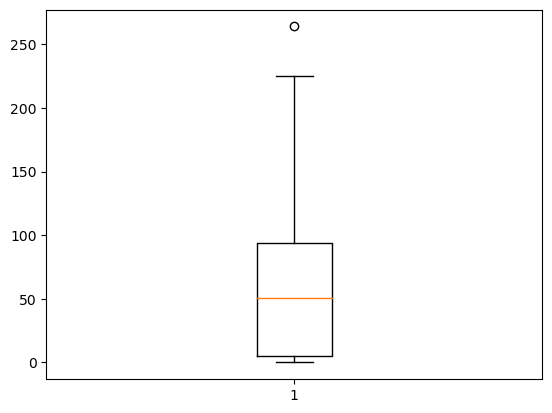

In [ ]:
import matplotlib as mpl
import matplotlib.pylab as plt
plt.boxplot(df1['fpl_points'])
plt.show()

In [ ]:
df1[df1.fpl_points>250]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.1,264,3.0,Chile,0,1


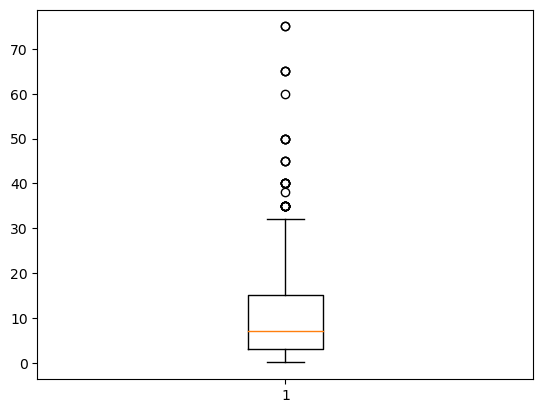

In [ ]:
plt.boxplot(df1['market_value'])
plt.show()

In [ ]:
df1[df1.market_value>33]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
0,0,Aaron Ramsey,Arsenal,26,CM,2,35.0,1040.0,7.0,5.1,56,1.0,Wales,0,1
3,3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.5,0,2.0,France,1,1
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.1,264,3.0,Chile,0,1
11,11,Granit Xhaka,Arsenal,24,DM,2,35.0,1815.0,5.5,2.0,85,2.0,Switzerland,0,1
17,17,Mesut Ozil,Arsenal,28,AM,1,50.0,4395.0,9.5,5.6,167,2.0,Germany,0,1
94,94,Cesc Fabregas,Chelsea,30,CM,2,35.0,2378.0,7.0,7.5,121,2.0,Spain,0,1
96,96,Diego Costa,Chelsea,28,CF,1,50.0,4454.0,10.0,3.0,196,2.0,Spain,0,1
97,97,Eden Hazard,Chelsea,26,LW,1,75.0,4220.0,10.5,2.3,224,2.0,Belgium,0,1
104,104,N%27Golo Kante,Chelsea,26,DM,2,50.0,4042.0,5.0,13.8,83,2.0,France,0,1
105,105,Nemanja Matic,Chelsea,28,DM,2,35.0,892.0,5.0,5.0,105,2.0,Serbia,0,1


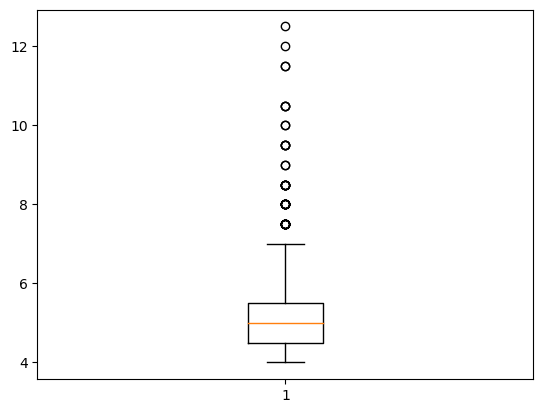

In [ ]:
plt.boxplot(df1['fpl_value'])
plt.show()

In [ ]:
df1[df1.fpl_value>7.3]

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club
3,3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.5,0,2.0,France,1,1
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.1,264,3.0,Chile,0,1
6,6,Danny Welbeck,Arsenal,26,CF,1,15.0,1521.0,7.5,0.5,37,1.0,England,0,1
16,16,Lucas Perez,Arsenal,28,CF,1,15.0,2055.0,7.5,0.1,20,2.0,Spain,0,1
17,17,Mesut Ozil,Arsenal,28,AM,1,50.0,4395.0,9.5,5.6,167,2.0,Germany,0,1
20,20,Olivier Giroud,Arsenal,30,CF,1,22.0,2230.0,8.5,2.5,116,2.0,France,0,1
27,27,Theo Walcott,Arsenal,28,RW,1,20.0,2393.0,7.5,1.5,122,1.0,England,0,1
39,39,Jermain Defoe,Bournemouth,34,CF,1,5.0,3213.0,8.0,15.0,166,1.0,England,0,0
41,41,Joshua King,Bournemouth,25,SS,1,8.0,997.0,7.5,10.4,178,2.0,Norway,0,0
96,96,Diego Costa,Chelsea,28,CF,1,50.0,4454.0,10.0,3.0,196,2.0,Spain,0,1


fpl point , fpl value 와 market value의 이상치를 확인했다. fpl point는 한명의 선수, 나머지 두 칼럼들은 꽤 많은 이상치를 가지고있다.

하지만 세부적으로 이상치에 해당되는 선수들을 살펴보니 이상치로 처리해 삭제 혹은 대체 하지는 않겠다는 결론을 내렸다.
그 이유로는
1. 모두 유명하고 실력있는 선수들이다. 이상치가 잘못 측정된 수치는 아니라고 생각한다.
2. 프로스포츠의 특성상 유명하고 실력있는 선수들은 끝없이 주목받는 반면, 아무도 관심없는 선수가 꽤 많기에 이러한 결과가 나왔다.
3. 이상치로 나타난 선수 중 특정 칼럼만 확 튀는 선수는 없다.
4. 1번과 연결되는 이야기지만 유명하고 실력있는 리그를 대표하는 선수를 제외하고 데이터 분석을 하는 일은 의미가 없다고 느껴진다.

#### 따라서 이상치 처리를 하지 않기로 결정했다.

## 4. 데이터 탐색

우선 선수들의 나이 역시 시장가치나 실력에 영향을 미치는지 확인해보려고한다. 나이별로 재구조화를 진행하려고한다.

위에서 확인할 수 있듯이 평균 나이는 26.8세, 가장 어린 선수는 17세, 가장 나이가 많은 선수는 38세이다. 나이라는 변수의 특성상 동일 개수보다 동일 길이로 재구조화 하는 것이 더 적합하다 판단되어 나이를 5개의 동일길이로 재구조화하도록 하겠다.

In [ ]:
df2=pd.cut(df1.age,5)
df2

0        (25.4, 29.6]
1      (16.979, 21.2]
2        (21.2, 25.4]
3        (25.4, 29.6]
4        (25.4, 29.6]
            ...      
456      (21.2, 25.4]
457      (25.4, 29.6]
458      (21.2, 25.4]
459      (25.4, 29.6]
460      (25.4, 29.6]
Name: age, Length: 458, dtype: category
Categories (5, interval[float64, right]): [(16.979, 21.2] < (21.2, 25.4] < (25.4, 29.6] < (29.6, 33.8] < (33.8, 38.0]]

In [ ]:
labels = ['1','2','3','4','5']
df1['age_cat'] = pd.cut(df1['age'],5,labels=labels)
df1

/var/folders/zj/xmxl2wd97sn2l9b0kp7qx6w80000gn/T/ipykernel_52734/3049285655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_cat'] = pd.cut(df1['age'],5,labels=labels)


,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club,age_cat
0,0,Aaron Ramsey,Arsenal,26,CM,2,35.0,1040.0,7.0,5.1,56,1.0,Wales,0,1,3
1,1,Alex Iwobi,Arsenal,21,LW,1,10.0,1812.0,5.5,1.0,89,4.0,Nigeria,0,1,1
2,2,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519.0,6.0,1.8,83,1.0,England,0,1,2
3,3,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183.0,10.5,26.5,0,2.0,France,1,1,3
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.1,264,3.0,Chile,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,Pedro Obiang,West+Ham,25,CM,2,9.0,286.0,4.5,0.3,55,2.0,Spain,0,0,2
457,457,Robert Snodgrass,West+Ham,29,RW,1,8.0,1210.0,6.0,6.5,133,2.0,Scotland,0,0,3
458,458,Sam Byram,West+Ham,23,RB,3,4.5,198.0,4.5,0.3,29,1.0,England,0,0,2
459,459,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394.0,5.5,0.2,55,4.0,Algeria,0,0,3


이제 위에 df1을 보면 age_cat 이라는 칼럼이 새로 생긴 것을 확인할 수 있다.

가장 어린 선수들 그룹을 1, 나이 많은 선수들의 그룹을 5로 만들어 범주화했다. (16.979, 21.2] < (21.2, 25.4] < (25.4, 29.6] < (29.6, 33.8] < (33.8, 38.0) 의 기준으로 나뉘었다.

## 5. 데이터 분석

이제 본격적으로 데이터그룹 분석을 진행해보겠다. 분석 전에 크게 궁금한 점을 나누어놓고 시작하겠다.
#### 주요한 범주형 변수인 나이 / 국적 / 포지션 / 빅클럽 여부 에 따른 market_value(시장가치) / fpl_point( 실력 ) / page_views ( 인기 ) / fpl_sel(인기& 실력)이 궁금하다.


이를 기준으로 두고 분석을 시작하겠다.
우선 나이가 시장가치와 실력, 인기에 어떤 영향을 끼칠지 알아보겠다.

먼저 나이별로 시장가치 / fpl_point( 실력 ) / fpl_sel & page_views ( 인기 ) 에 대한 평균을 파악한다.

In [ ]:
df1.groupby('age_cat')[['age', 'market_value','fpl_points','page_views','fpl_sel']].mean()

,age,market_value,fpl_points,page_views,fpl_sel
age_cat,,,,,
1,20.160000,6.637000,28.040000,788.320000,2.402000
2,23.846154,14.168803,50.709402,843.452991,4.233333
3,27.274286,13.270857,65.302857,753.325714,2.793714
4,31.067416,7.530899,66.685393,680.404494,3.070787
5,34.962963,2.029630,58.370370,752.148148,4.192593


시장가치의 경우 나이 그룹 2와3, 즉 운동선수로써 전성기의 나이인 21~29의 선수가 가장 높은 것을 확인할 수 있다. 당장 좋은 성적을 내줄 수 있는 즉시전력감 선수일뿐 아니라, 계약기간이 만료되어도 이적이 가능한 나이기 때문이다.

다음으로 fpl_points 즉, 실력에 관한 지표다. 실력은 시장가치와 조금 다르게 4,3,5,2,1 순으로 높게 나타났다.

page_views의 경우에는 인기에 관한 지표로써 2,1,3,5,4 순으로 높게 나타났다.

마지막으로 fpl_sel은 2,5,4,3,1 순으로 나타나는 것을 확인할 수 있다.

그럼 위 내용에 빅클럽 여부까지 추가해서 확인해보자. 나이별, 빅클럽 여부 별 평균을 알아보겠다.

In [ ]:
df1.groupby(['age_cat','big_club'])[['market_value','fpl_points','page_views','fpl_sel']].mean()

market_value  fpl_points   page_views   fpl_sel
age_cat big_club                                                 
1       0             3.588710   18.548387   367.516129  1.348387
        1            11.610526   43.526316  1474.894737  4.121053
2       0             7.544521   37.123288   464.698630  2.615068
        1            25.159091   73.250000  1471.840909  6.918182
3       0             7.737500   52.859375   407.468750  1.642969
        1            28.340426   99.191489  1695.234043  5.927660
4       0             4.526515   60.227273   529.121212  2.595455
        1            16.152174   85.217391  1114.521739  4.434783
5       0             1.369048   56.047619   629.857143  4.833333
        1             4.341667   66.500000  1180.166667  1.950000

fpl_sel을 제외하고는 모든 나이대에서 모든 요소가 빅클럽 소속 선수가 높게 나타난다. 아무래도 빅클럽일수록 팬들의 규모도 돈도 많기 때문에 당연하게도 이러한 결과가 나온다고 생각한다.

다음으로는 국적에 따라 그룹 분석을 해보겠다.

In [ ]:
df1.groupby('region')[['market_value','fpl_points','page_views','fpl_sel']].mean()

,market_value,fpl_points,page_views,fpl_sel
region,,,,
1.0,8.482372,55.051282,730.051282,3.299359
2.0,12.224029,59.825243,760.121359,3.420388
3.0,14.704878,65.146341,934.926829,4.321951
4.0,10.777273,48.927273,763.472727,1.714545


예상과 다르게 3번 그룹, 즉 아메리카 대륙 소속 선수들에게서 모든 지표가 제일 높게 나타났다.

다음으로는 포지션 별로 살펴보겠다.

In [ ]:
df1.groupby('position_cat')[['market_value','fpl_points','page_views','fpl_sel']].mean()

,market_value,fpl_points,page_views,fpl_sel
position_cat,,,,
1,14.583660,67.111111,1129.732026,3.727451
2,10.765766,49.216216,753.216216,2.120721
3,8.598026,53.782895,476.375000,3.194737
4,7.234524,56.380952,522.166667,4.750000


예상대로 공격수들의 시장가치가 가장 높게 나타났다. 아무래도 골을 넣어야 이기는 게임이기에 골을 넣을 가능성이 높은 1,2,3,4 순으로 시장가치가 높은 경향이 나타난다.

fpl_points 는 실력이라는 지표로 설정했지만 이 수치로 인해 가장 평균치가 높은 공격수가 가장 낮은 미드필더에 비해 실력이 좋다고 보기는 힘들다. 점수를 부여하는 기준에 따라 크게 달라질 수 있는 영역이기 때문이다. 그냥 공격수,골키퍼,수비수,미드필더 순으로 높다는 것 정도만 알아두고 넘어가겠다.

page_views 는 공격수,미드필더,골키퍼,수비수 순으로 나타났고

fpl_sel 골키퍼,공격수,수비수,미드필더 순으로 나타났다.

In [ ]:
df1.groupby(['position_cat','big_club'])[['market_value','fpl_points','page_views','fpl_sel']].mean()

market_value  fpl_points   page_views   fpl_sel
position_cat big_club                                                 
1            0             8.155093   52.750000   705.712963  2.194444
             1            30.012222  101.577778  2147.377778  7.406667
2            0             6.220779   40.155844   373.519481  1.177922
             1            21.058824   69.735294  1613.117647  4.255882
3            0             4.687736   46.556604   284.311321  2.500943
             1            17.608696   70.434783   918.956522  4.793478
4            0             4.401786   52.821429   375.214286  4.392857
             1            12.900000   63.500000   816.071429  5.464286

간단하게 위 내용에 빅클럽 여부까지 추가해서 확인했다. 포지션별, 빅클럽 여부 별 평균을 알아보겠다.

아까 나이별, 빅클럽 여부 별 결과와는 다르게 모든 포지션의 지표에서 빅클럽 소속 선수의 평균 수치가 높게 나타났다.


하지만 분석을 하던 도중 새로운 의문점이 생겨났다. 위에서 언급했던 것과 같이 프로스포츠의 특성상 유명하고 실력있는 선수들은 끝없이 주목받는 반면, 아무도 관심없는 선수가 꽤 많다는 사실에 대해 고민해보았다. 그렇기에 간단하게 한번 연봉 상위 100명만을 대상으로 나이별, 국적별로 시장가치 / fpl_point( 실력 ) / fpl_sel & page_views ( 인기 )를 다시 한번 비교해보겠다.


우선 100명만으로 새로운 데이터프레임을 만들어보겠다.

In [ ]:
new_df = df1.sort_values('market_value', ascending=False).head(100)

newdf = pd.DataFrame(new_df)
newdf

,Unnamed: 0,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club,age_cat
279,279,Paul Pogba,Manchester+United,24,CM,2,75.0,7435.0,8.0,19.5,115,2.0,France,0,1,2
97,97,Eden Hazard,Chelsea,26,LW,1,75.0,4220.0,10.5,2.3,224,2.0,Belgium,0,1,3
252,252,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252.0,10.0,17.5,199,2.0,Belgium,0,1,3
257,257,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046.0,11.5,9.7,175,3.0,Argentina,0,1,3
4,4,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329.0,12.0,17.1,264,3.0,Chile,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,218,Dejan Lovren,Liverpool,28,CB,3,17.0,708.0,5.5,1.3,106,2.0,Croatia,0,1,3
99,99,Gary Cahill,Chelsea,31,CB,3,16.0,1420.0,6.5,12.0,178,1.0,England,0,1,4
108,108,Tiemoue Bakayoko,Chelsea,22,DM,2,16.0,1011.0,5.0,1.6,0,2.0,France,1,1,2
251,251,Kelechi Iheanacho,Manchester+City,20,CF,1,15.0,1662.0,7.0,1.5,52,4.0,Nigeria,0,1,1


연봉 상위 100명의 나이와 지역별 인원을 우선 파악해보자.

In [ ]:
pd.crosstab(newdf['age_cat'],newdf['region'],margins=True)

region,1.0,2.0,3.0,4.0,All
age_cat,,,,,
1,2,2,1,1,6
2,9,14,4,6,33
3,11,26,5,7,49
4,1,8,3,0,12
All,23,50,13,14,100


우선 age_cat 5 (33.8~ 38.0세의 선수)는 연봉 상위 100명중에 한명도 없는 사실을 알 수 있다.

In [ ]:
newdf.groupby('age_cat')[['age', 'market_value','fpl_points','page_views','fpl_sel']].mean()

,age,market_value,fpl_points,page_views,fpl_sel
age_cat,,,,,
1,20.333333,28.833333,103.333333,3157.000000,11.583333
2,23.757576,31.484848,94.151515,1744.545455,9.700000
3,27.183673,30.428571,112.816327,1681.102041,6.238776
4,30.666667,23.583333,108.000000,1292.166667,6.458333
5,NaN,NaN,NaN,NaN,NaN


In [ ]:
newdf.groupby('region')[['market_value','fpl_points','page_views','fpl_sel']].mean()

,market_value,fpl_points,page_views,fpl_sel
region,,,,
1.0,26.521739,111.130435,1686.826087,7.469565
2.0,31.820000,106.420000,1729.300000,8.080000
3.0,33.538462,108.000000,1944.538462,10.123077
4.0,24.928571,90.714286,1703.642857,4.671429


예상과 다르게 생각보다 전체 선수의 지표와 큰 차이가 없다는 것을 확인할 수 있었다. 나이에서는 2,3 그룹의 선수가 , 지역은 3그롭(아메리카 대륙)소속 선수가 많은 지표에서 우수한 모습을 보이고 있다.

마지막으론 클럽별로 수치를 확인해보고, 그리고 실제 17/18 시즌의 순위표와 얼마나 비슷한지 확인해보겠다.
이를 통해 어떤 지표가 실제로 성적과 가장 큰 연관이 있는지 확인해볼 수 있다.

17/18의 순위는
1. 맨체스터 시티
2. 맨체스터 유나이티드
3. 토트넘
4. 리버풀
5. 첼시
6. 아스널
7. 번리
8. 에버튼
9. 레스터 시티
10. 뉴캐슬

In [ ]:
df2 = df1.groupby('club')[['age', 'market_value', 'fpl_points', 'page_views', 'fpl_sel']].mean()
df3 = df2.sort_values(by='market_value', ascending=False)

df3

,age,market_value,fpl_points,page_views,fpl_sel
club,,,,,
Manchester+City,27.000000,28.200000,81.950000,1474.350000,5.350000
Chelsea,27.050000,27.677500,101.900000,1773.800000,6.745000
Tottenham,25.631579,22.894737,95.105263,1225.105263,7.800000
Manchester+United,25.560000,20.564000,70.600000,1815.360000,6.184000
Arsenal,26.678571,19.642857,68.928571,1402.785714,3.939286
Liverpool,24.777778,16.314815,70.074074,1195.296296,4.444444
Everton,26.214286,10.098214,62.321429,908.785714,3.278571
Southampton,24.956522,10.000000,60.000000,473.956522,3.169565
West+Ham,27.285714,8.809524,69.142857,514.142857,1.628571


In [ ]:
df3 = df2.sort_values(by='fpl_points', ascending=False)
df3

,age,market_value,fpl_points,page_views,fpl_sel
club,,,,,
Chelsea,27.050000,27.677500,101.900000,1773.800000,6.745000
Tottenham,25.631579,22.894737,95.105263,1225.105263,7.800000
Manchester+City,27.000000,28.200000,81.950000,1474.350000,5.350000
West+Brom,28.210526,5.328947,71.263158,345.315789,3.289474
Manchester+United,25.560000,20.564000,70.600000,1815.360000,6.184000
Liverpool,24.777778,16.314815,70.074074,1195.296296,4.444444
West+Ham,27.285714,8.809524,69.142857,514.142857,1.628571
Arsenal,26.678571,19.642857,68.928571,1402.785714,3.939286
Bournemouth,26.875000,4.895833,68.750000,508.458333,3.820833


In [ ]:
df3 = df2.sort_values(by='page_views', ascending=False)
df3

,age,market_value,fpl_points,page_views,fpl_sel
club,,,,,
Manchester+United,25.560000,20.564000,70.600000,1815.360000,6.184000
Chelsea,27.050000,27.677500,101.900000,1773.800000,6.745000
Manchester+City,27.000000,28.200000,81.950000,1474.350000,5.350000
Arsenal,26.678571,19.642857,68.928571,1402.785714,3.939286
Tottenham,25.631579,22.894737,95.105263,1225.105263,7.800000
Liverpool,24.777778,16.314815,70.074074,1195.296296,4.444444
Everton,26.214286,10.098214,62.321429,908.785714,3.278571
Leicester+City,27.250000,8.645833,59.875000,712.750000,1.225000
Stoke+City,28.045455,6.818182,59.409091,562.954545,1.131818


In [ ]:
df3 = df2.sort_values(by='fpl_sel', ascending=False)
df3

,age,market_value,fpl_points,page_views,fpl_sel
club,,,,,
Tottenham,25.631579,22.894737,95.105263,1225.105263,7.800000
Chelsea,27.050000,27.677500,101.900000,1773.800000,6.745000
Manchester+United,25.560000,20.564000,70.600000,1815.360000,6.184000
Manchester+City,27.000000,28.200000,81.950000,1474.350000,5.350000
Liverpool,24.777778,16.314815,70.074074,1195.296296,4.444444
Arsenal,26.678571,19.642857,68.928571,1402.785714,3.939286
Bournemouth,26.875000,4.895833,68.750000,508.458333,3.820833
Crystal+Palace,28.047619,7.726190,63.619048,455.428571,3.695238
West+Brom,28.210526,5.328947,71.263158,345.315789,3.289474


'market_value', 'fpl_points', 'page_views', 'fpl_sel' 순으로 내림차순으로 정렬해보았는데 market_value(시장가치)로 내림차순해서 정렬했을때 가장 순위표와 유사한 결과가 나타났다.
#### 즉, 시장가치가 팀 성적과 가장 큰 연관성이 있다고 추측할 수 있다.

## 6. 데이터 시각화

결과적으로 시각화를 진행하게 될 수치는 나이별,포지션별,출신 지역 별 시장가치이다.
데이터 분석을 진행하기 전 예상했던 점은 나이가 적을수록, 포지션은 FW -> MF -> GK -> DF 순으로 예상했고 출신의 경우는 잉글랜드 출신 선수가 가장 시장가치가 높을것으로 예상했다.



그 전에 우선 좀 더 직관적으로 그래프를 이해하기 위해 age_cat , region , big_club , position_cat 같이 숫자로 이루어진 범주형 칼럼들의 변수들을
정확하게 표현하는 작업을 하도록 하겠다.

In [ ]:
df1['age_cat'] = df1['age_cat'].replace({'1': '17 ~ 21.2', '2': '21.2 ~ 25.4', '3': '25.4 ~ 29.6', '4': '29.6 ~ 33.8','5':'33.8 ~ 38.0'})
df1['region'] = df1['region'].replace({1.0: 'England', 2.0: 'EU except England', 3.0: 'America', 4.0: 'Others'})
df1['big_club'] = df1['big_club'].replace({1:'Big Club',0:'Non Big Club'})
df1['position_cat'] = df1['position_cat'].replace({1:'FW',2:'MF',3:'DF',4:'GK'})


/var/folders/zj/xmxl2wd97sn2l9b0kp7qx6w80000gn/T/ipykernel_52734/1855907341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_cat'] = df1['age_cat'].replace({'1': '17 ~ 21.2', '2': '21.2 ~ 25.4', '3': '25.4 ~ 29.6', '4': '29.6 ~ 33.8','5':'33.8 ~ 38.0'})
/var/folders/zj/xmxl2wd97sn2l9b0kp7qx6w80000gn/T/ipykernel_52734/1855907341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region'] = df1['region'].replace({1.0: 'England', 2.0: 'EU except England', 3.0: 'America', 4.0: 'Others'})
/var/

먼저 진행할 시각화는 '나이별 시장가치'이다. 범례로는 빅클럽 여부를 추가했다. seaborn에 내장 시각화 툴인 catplot을 이용했다. 나이에 대한 데이터는 앞서 범주화한 age_cat을 이용했다.

/Users/sbnama/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbnama/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbnama/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbnama/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbnama/opt/anaconda3/lib/python3.9/site-packa

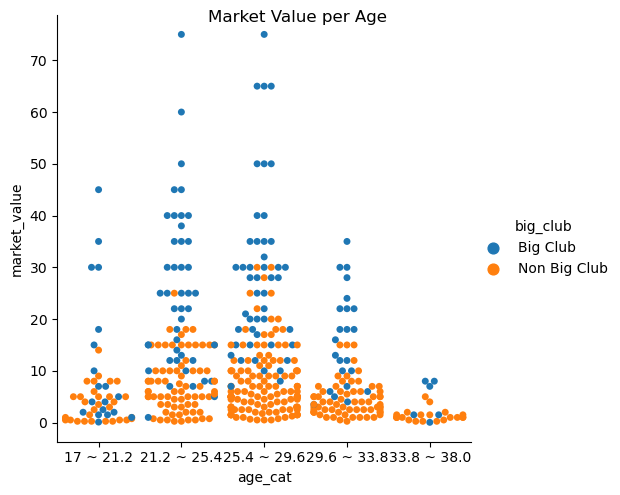

In [ ]:
import seaborn as sns

plot = sns.catplot(x="age_cat", y='market_value', hue='big_club', kind='swarm', data=df1)

plot.fig.suptitle('Market Value per Age')
plt.show()

위 시각화 자료를 통해 파악 할 수 있는 점은

1. 빅클럽 소속 선수들이 대체적으로 높은 시장가치를 가지고있다.
2. 25.4~29.6세 선수들이 가장 많다.
3. 최고 시장가치의 선수들은 21.2~29.6세인 경우가 많다.
4. 25.4 - 29.6 , 21.2 - 25.4 , 17 - 21.2 , 29.6 - 33.8, 33.8 - 38 의 순서로 높은 시장가치를 지닌다.

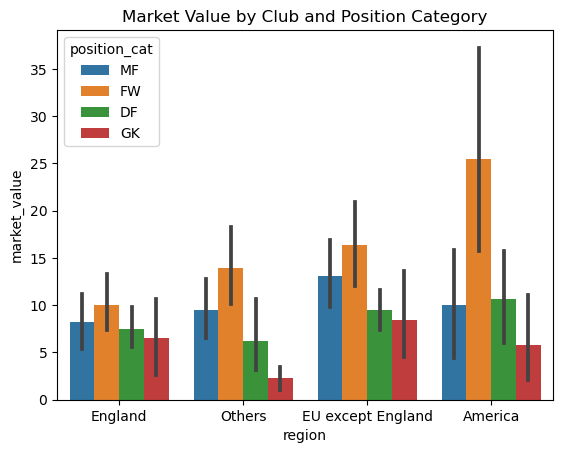

In [ ]:
plot = sns.barplot(x='region', y='market_value', hue='position_cat', data=df1)

plot.set_title('Market Value by Club and Position Category')
plt.show()

분석 결론: 다음은 지역별 시장가치를 barplot을 확인했다. 범례로는 포지션을 선택했다.

결과를 확인해보자면 먼저 포지션별로는 대체적으로 FW -> MF -> DF -> GK 순으로 시장가치가 높게 나타났다. 다만 아메리카 대륙의 경우 DF 가 MF 보다 살짝 높게 나타났다.

다음으로는 지역별 시장가치인데 앞서 했던 예상과 다르게 잉글랜드 소속 선수들의 시장가치가 낮은 것을 확인해 볼 수 있다. 아메리카와 잉글랜드 외 유럽 국가 다음에 위치하며 어찌보면 그 외 국가들 소속 선수들과도 비슷해보인다.

## 7. 데이터 또는 분석 과정 차별화 포인트

데이터 또는 분석과정에서의 차별 포인트로는
1. FPL 이라는 실제 경기에 영향을 받는 게임 내의 데이터를 이용했다는 점이 특별하다.
2. page_views 라는 일일 평균 위키피디아 검색량을 통해 어찌보면 추상적일 수 있는 선수들의 인기 및 관심도를 확인했다.
3. 대부분의 축구 관련 데이터를 보면 게임 내 세부 스텟 ( 골, 어시, 슈팅, 패스 횟수 및 성공확률, 박스 내 터치 횟수, 클리어링 횟수, 선방 횟수 등) 를 통해 선수들을 분석하는 경우가 많은데, 이 데이터는 선수들의 세부 스텟 대신 fpl_point 라는 지표로 실력을 나타낸다. EPL에서 직접 운영하는 게임이고, 실제 경기에서 쌓은 앞서 말한 '세부 스텟'을 이용해 숫자로 표현한 수치기이게 신뢰성도 충분하다.
4. 스포츠 분야의 특성상 선수들의 실력,시장가치,인기가 피라미드 형태로 나타나게 된다는 것을 고려했다. 그렇기에 이상 데이터 처리를 하지 않았고, 또 몸값 상위 100명의 선수만을 가지고도 분석을 진행하기도 했다. 이러한 현상은 첫번째 시각화 자료를 보면 잘 이해할 수 있다.
5. 실제 17/18시즌의 순위표를 이용해 어떤 지표가 성적과 가장 큰 관련을 가지고 있는지 비교 분석했다.